In [86]:
from PIL import Image
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
%config InlineBackend.figure_format='retina'
from collections import Counter
import numpy as np
import json
import os

In [87]:
dataroot = '/opt/ml/detection/dataset'
all_images = glob(os.path.join(dataroot, 'train', '*'))
all_images += glob(os.path.join(dataroot, 'test', '*'))

print(len(all_images))

9754


In [88]:
img = Image.open(all_images[0])
rgb = np.array(img)
print(rgb.shape)

(1024, 1024, 3)


In [89]:
# r = []
# g = []
# b = []

# for idx, image in enumerate(tqdm(all_images)):
#     img = Image.open(image)
#     rgb = np.array(img)
#     r.append(np.mean(rgb[:,:,0]))
#     g.append(np.mean(rgb[:,:,1]))
#     b.append(np.mean(rgb[:,:,2]))

# print(f'mean(R G B): {np.mean(r): .4f} {np.mean(g): .4f} {np.mean(b): .4f}')
# print(f'std (R G B): {np.std(r): .4f} {np.std(g): .4f} {np.std(b): .4f}')

In [115]:
train_json_path = '/opt/ml/detection/dataset/old/train.json'
train_json = json.load(open(train_json_path, 'r'))
annots = train_json['annotations']

t = []
s = []
m = []
l = []
for ann in annots:
    _,_,w,h = ann['bbox']
    bsize = w*h
    bratio = round(h/w, 1)
    t.append(bratio)
    if bsize < 32**2:
        s.append(bratio)
    elif 32**2 <= bsize < 96**2:
        m.append(bratio)
    else:
        l.append(bratio)

cntt = Counter(t)
cnts = Counter(s)
cntm = Counter(m)
cntl = Counter(l)


(0.4, 37)

(0.6, 459)

(0.7, 1646)



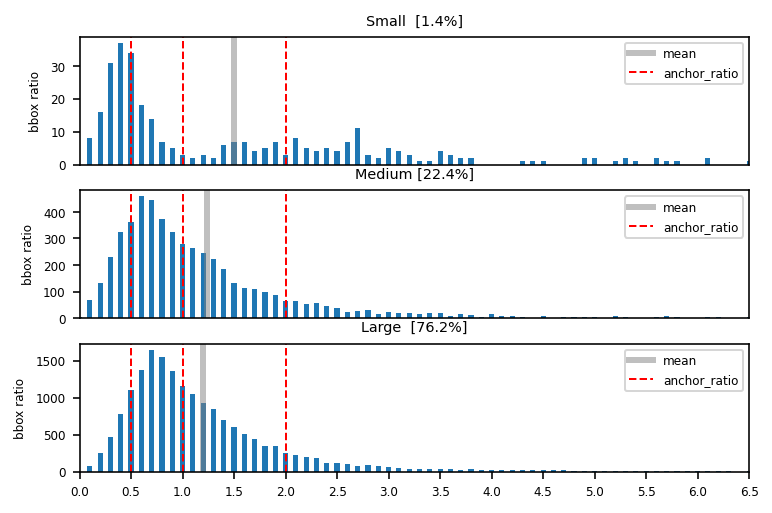

In [138]:
plt.rc('font', size=6)
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

print(max(cnts.items(), key=lambda x: x[1]), end='\n\n')
print(max(cntm.items(), key=lambda x: x[1]), end='\n\n')
print(max(cntl.items(), key=lambda x: x[1]), end='\n\n')

xts = [i/10 for i in range(0,100,5)]

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks(xts)

lens = np.array([len(s), len(m), len(l)])
lens = lens / np.sum(lens)

bwidth = 0.05
lim = 6.5

for ax, cnt, title_name, proportion, mean in zip([ax1, ax2, ax3], [cnts, cntm, cntl], ['Small ', 'Medium', 'Large '], lens, [np.mean(s), np.mean(m), np.mean(l)]):
    ax.set_title(f'{title_name} [{round(proportion*100,1)}%]')
    ax.set_xlim(0,lim)
    bars = ax.bar(cnt.keys(), cnt.values(), width=bwidth)

    ax.axvline(x=mean, color='gray', linestyle='-', linewidth=3, label='mean', alpha=0.5)
 
    ax.axvline(x=0.5, color='r', linestyle='--', linewidth=1, label='anchor_ratio')
    ax.axvline(x=1.0, color='r', linestyle='--', linewidth=1)
    ax.axvline(x=2.0, color='r', linestyle='--', linewidth=1)
    ax.legend()
    ax.set_ylabel('bbox ratio')
plt.savefig('./original_anchor_ratio.jpg', dpi=1440)


(0.4, 37)

(0.6, 459)

(0.7, 1646)



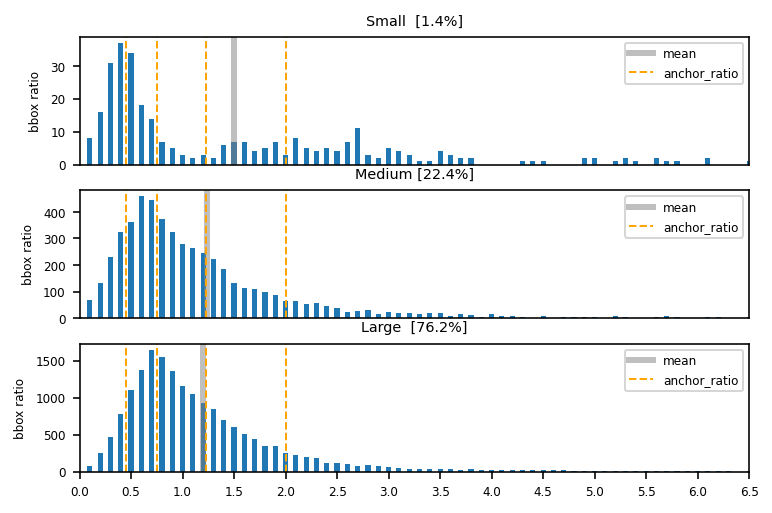

In [141]:
# plt.rc('font', size=4)
fig = plt.figure()
row, col = 3,1
ax1 = fig.add_subplot(row,col,1)
ax2 = fig.add_subplot(row,col,2)
ax3 = fig.add_subplot(row,col,3)

print(max(cnts.items(), key=lambda x: x[1]), end='\n\n')
print(max(cntm.items(), key=lambda x: x[1]), end='\n\n')
print(max(cntl.items(), key=lambda x: x[1]), end='\n\n')

xts = [i/10 for i in range(0,100,5)]

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks(xts)

lens = np.array([len(s), len(m), len(l)])
lens = lens / np.sum(lens)

bwidth = 0.05
lim = 6.5

for ax, cnt, title_name, proportion, mean in zip([ax1, ax2, ax3], [cnts, cntm, cntl], ['Small ', 'Medium', 'Large '], lens, [np.mean(s), np.mean(m), np.mean(l)]):
    ax.set_title(f'{title_name} [{round(proportion*100,1)}%]')
    # ax.set_title(f'{title_name}_bbox_ratio [{round(proportion*100,1)}%]')
    ax.set_xlim(0,lim)
    bars = ax.bar(cnt.keys(), cnt.values(), width=bwidth)

    ax.axvline(x=mean, color='gray', linestyle='-', linewidth=3, label='mean', alpha=0.5)
 
    ax.axvline(x=0.45, color='orange', linestyle='--', linewidth=1, label='anchor_ratio')
    ax.axvline(x=0.75, color='orange', linestyle='--', linewidth=1)
    ax.axvline(x=1.23, color='orange', linestyle='--', linewidth=1)
    ax.axvline(x=2.00, color='orange', linestyle='--', linewidth=1)
    ax.legend()
    ax.set_ylabel('bbox ratio')
plt.savefig('./new_anchor_ratio.jpg', dpi=1440)


In [34]:
print(f'mean s: {np.mean(s): .2f}')
print(f'mean m: {np.mean(m): .2f}')
print(f'mean l: {np.mean(l): .2f}')


mean s:  1.50
mean m:  1.23
mean l:  1.19
